# Homework 5  - AM 205

Got help from Yue, Jovana and Chris Office Hours.

## Thank you! :-)

Thank you all for your patience and help for taking the time to explain me all these concepts and walk me through the exercises! I started off the semester by never having touched python and by asking in Yue's first OH how to plot a line (embarassingly enough, I remember I even asked her what matplotlib was lol). I thank you all for the patience and the time! Although this was the toughest class I ever took so far, I learned so much in this class and enjoyed it a lot.

Wish you all a great christmas break! :- ) 

# Problem 1

Collaborated with Adriana for problem 1. 

In problem 1 I am going to minimize the **Rosenbrock function**:

$$f(x, y) = 100(y-x^2)^2 + (1 - x)^2$$

where its global minimum of 0 is at $(x,y) = (1,1)$. In this exercise we shall apply three different optimization algorithms for this function.

The optimization algorithms will be terminated when the absolute step size falls below the tolerance of $10^{-8}$.

In [1]:
import numpy as np
from scipy.optimize import line_search
from numpy.linalg import norm


## Part a: Steepest Descent

$$f(x, y) = 100(y-x^2)^2 + (1 - x)^2$$

$$\frac{\delta f }{\delta y}= -200  x^2 + 200 y$$

$$\frac{\delta f }{\delta x}= -400 x (y - x^2) + 2x -2$$






In [2]:
#f = 100*(y-x**2)**2 + (1-x)**2
#fy = -200*x**2 + 200*y
#fx = -400*x*(-1*x**2+y)+2*x -2

In [3]:

def f(array):
    return 100*(array[1]-array[0]**2)**2 + (1-array[0])**2

def grad(array):
    partial_x = -400*array[0]*(-1*array[0]**2 +array[1]) + 2*array[0]-2
    partial_y = -200*array[0]**2 + 200*array[1]
    return np.array([partial_x,partial_y])

start_pt1 = np.array([-1,1])
start_pt2 = np.array([0,1])
start_pt3 = np.array([2,1])


# just store xk
def steepest_grad(f, grad, x_start):
    max_iters = 2000
    step_size_tol = 10**-8
    sk = 1 # initial to start
    iteration = 0
    x_list = []
    x_list.append(x_start) # want to add the initial points
    while norm(sk) > step_size_tol and iteration < max_iters:
        gradient = grad(x_start)
        direction = -1*gradient
        alpha,fc, gc,new_fval,old_fval,slope = line_search(f,grad,x_start,direction)
        # Alpha is how much of the direction i am going to 
        
        #print(gradient)
        #print(line_search(f,grad,x_start,direction))
        
        ### NEXT STEP
        x_next = x_start - alpha*gradient
        
        ### SK IS STEPSIZE 
        sk = -1*alpha*gradient #stepsize
        x_list.append(x_next)
        x_start = np.copy(x_next) # index to the next one
        iteration += 1
    return x_list, iteration

In [4]:
start1, iteration1 = steepest_grad(f,grad, start_pt1)
start2, iteration2 = steepest_grad(f,grad, start_pt2)
start3, iteration3 = steepest_grad(f,grad, start_pt3)

In [5]:
print(f"Amount of iterations for {start_pt1} = {iteration1}\n"
f"Amount of iterations for {start_pt2} = {iteration2}\n"
f"Amount of iterations for {start_pt3} = {iteration3}")

Amount of iterations for [-1  1] = 2
Amount of iterations for [0 1] = 1571
Amount of iterations for [2 1] = 2000


Used this as inspiration for graphing: \
https://andreask.cs.illinois.edu/cs357-s15/public/demos/12-optimization/Steepest%20Descent.html

<ipython-input-6-a276876a0a3e>:11: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d")


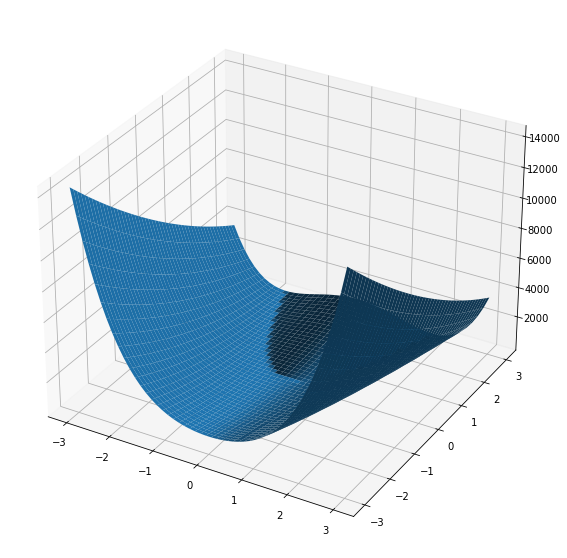

In [6]:

import numpy as np
import numpy.linalg as la

import scipy.optimize as sopt

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d


fig = plt.figure(figsize = (10,10))
ax = fig.gca(projection="3d")

xmesh, ymesh = np.mgrid[-3:3:50j,-3:3:50j]
fmesh = f(np.array([xmesh, ymesh]))
ax.plot_surface(xmesh, ymesh, fmesh)

Text(0, 0.5, 'y')

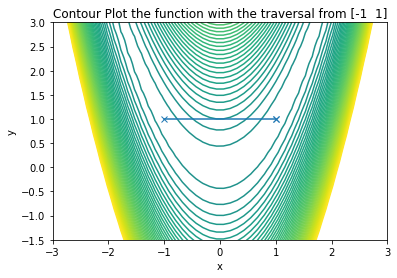

In [7]:
plt.figure()
levels = np.linspace(-2000, 2000, 100)
plt.contour(xmesh, ymesh, fmesh, levels = levels)
start1 = np.array(start1)
plt.plot(start1.T[0], start1.T[1], "x-")
plt.title(f"Contour Plot the function with the traversal from {start_pt1}")
plt.xlim(-3,3)
plt.ylim(-1.5,3)
plt.xlabel("x")
plt.ylabel("y")

Text(0, 0.5, 'y')

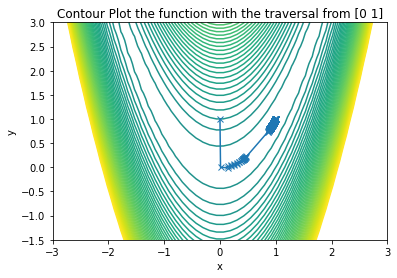

In [8]:
plt.figure()
levels = np.linspace(-2000, 2000, 100)
plt.contour(xmesh, ymesh, fmesh, levels = levels)
start2 = np.array(start2)
plt.plot(start2.T[0], start2.T[1], "x-")
plt.title(f"Contour Plot the function with the traversal from {start_pt2}")
plt.xlim(-3,3)
plt.ylim(-1.5,3)
plt.xlabel("x")
plt.ylabel("y")

Text(0.5, 1.0, 'Contour Plot the function with the traversal from [2 1]')

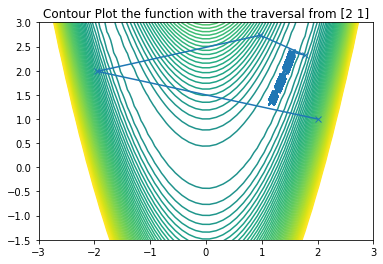

In [9]:
plt.figure()
levels = np.linspace(-2000, 2000, 100)
plt.contour(xmesh, ymesh, fmesh, levels = levels)
start3 = np.array(start3)
plt.plot(start3.T[0], start3.T[1], "x-")
plt.xlim(-3,3)
plt.ylim(-1.5,3)
plt.title(f"Contour Plot the function with the traversal from {start_pt3}")

## Part b: Newton's Method

In [10]:
# Problem b using newton's method
def f(array):
    return 100*(array[1]-array[0]**2)**2 + (1-array[0])**2

def grad(array):
    partial_x = -400*array[0]*(-1*array[0]**2 +array[1]) + 2*array[0]-2
    partial_y = -200*array[0]**2 + 200*array[1]
    return np.array([partial_x,partial_y])

def hess(array):
    partial_xx = 1200*array[0]**2 - 400*array[1] + 2
    partial_xy = -400*array[0]
    partial_yy = 200
    partial_yx = -400*array[0]
    return np.array([[partial_xx,partial_xy],[partial_yx, partial_yy]])

start_pt1 = np.array([-1,1])
start_pt2 = np.array([0,1])
start_pt3 = np.array([2,1])

def Newton(grad,hess, x_start):
    max_iters = 2000
    step_size_tol = 10**-8
    sk = 1 # initial to start
    iteration = 0
    x_list = []
    x_list.append(x_start) # want to add the initial points
    
    while norm(sk) > step_size_tol and iteration < max_iters:
        gradient = grad(x_start)
        hessian = hess(x_start)
        sk = np.linalg.solve(hessian,(-1*gradient))
        x_next = x_start  + sk
        x_list.append(x_next)
        x_start = np.copy(x_next) # index to the next one
        iteration += 1
    return x_list, iteration

In [11]:
start1_newton, iteration1 = Newton(grad, hess,start_pt1)
start2_newton,iteration2 = Newton(grad,hess,start_pt2)
start3_newton, iteration3 = Newton(grad,hess,start_pt3)
iter_list =[iteration1, iteration2, iteration3]

points = [start_pt1, start_pt2, start_pt3]
for index, i in enumerate(iter_list):
    print(f"Here is the Amount of Iterations for {points[index]}: {i}")

Here is the Amount of Iterations for [-1  1]: 3
Here is the Amount of Iterations for [0 1]: 6
Here is the Amount of Iterations for [2 1]: 6


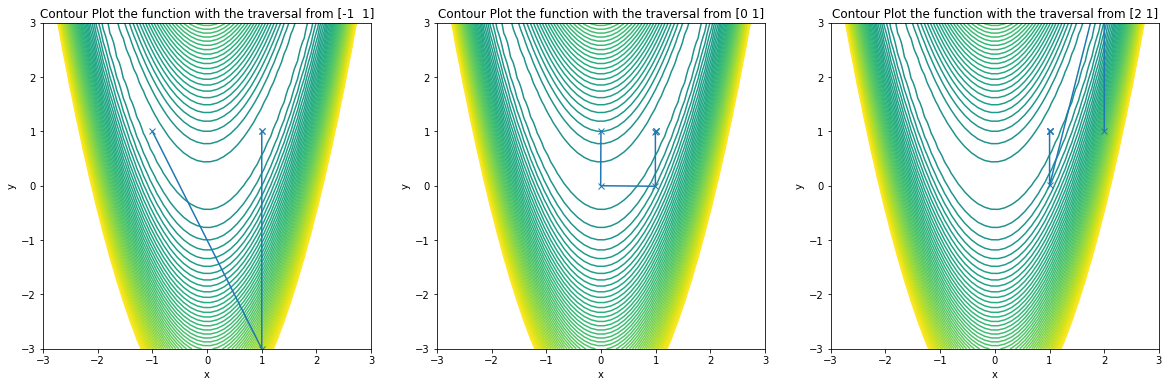

In [12]:
## This code works in Juptyer lab! 
fig, axs = plt.subplots(1, 3, figsize = (20,6))

start_list = [start1_newton, start2_newton, start3_newton]
for i, ax in enumerate(axs):
    levels = np.linspace(-2000, 2000, 100)
    ax.contour(xmesh, ymesh, fmesh, levels = levels)
    start = np.array(start_list[i])
    ax.plot(start.T[0], start.T[1], "x-")
    ax.set_title(f"Contour Plot the function with the traversal from {points[i]}")
    ax.set_xlim(-3,3)
    ax.set_ylim(-3,3)
    ax.set_xlabel("x")
    ax.set_ylabel("y")

## Part c: BFGS

In [13]:
# Problem c using BFGS
import numpy as np
from numpy.linalg import norm
def f(array):
    return 100*(array[1]-array[0]**2)**2 + (1-array[0])**2

def grad(array):
    partial_x = -400*array[0]*(-1*array[0]**2 +array[1]) + 2*array[0]-2
    partial_y = -200*array[0]**2 + 200*array[1]
    return np.array([partial_x,partial_y])


start_pt1 = np.array([-1,1])
start_pt2 = np.array([0,1])
start_pt3 = np.array([2,1])

def BFGS(grad, x_start):
    Hk = np.identity(2)
    max_iters = 2000
    step_size_tol = 10**-8
    sk = 1 
    iteration = 0
    x_list = []
    x_list.append(x_start) # want to add the initial point

    while norm(sk) > step_size_tol and iteration < max_iters:
        gradient = grad(x_start)
        sk = np.dot(Hk,(-1*gradient))
       
        x_next = x_start  + sk
        # now update yk
        yk = grad(x_next) - gradient
        
        
        # matrix multiplications
        pk = 1/np.inner(yk.T,sk) # scalar, can also do a dot product
        sk2 = np.outer(sk,sk.T) # 2x2
        ykskT = np.outer(yk,sk.T) #can used to substitute later
        skykT = np.outer(sk, yk.T)
        I = np.identity(2) # need to use in delta_H equation
        
        # Trying to solve for Delta_H
        part1 = np.dot((I-pk*skykT),Hk)
        delta_H = np.dot(part1,(I-pk*ykskT)) + (pk*sk2)
       
        H_next = delta_H
        
        # update all values
        x_list.append(x_next)
        x_start = np.copy(x_next) # index to the next one
        Hk = np.copy(H_next)
        iteration += 1
    return x_list, iteration

In [14]:
start1_bfgs, iteration1 = BFGS(grad,start_pt1)
start2_bfgs,iteration2 = BFGS(grad,start_pt2)
start3_bfgs, iteration3 = BFGS(grad,start_pt3)
iter_list =[iteration1, iteration2, iteration3]

points = [start_pt1, start_pt2, start_pt3]
for index, i in enumerate(iter_list):
    print(f"Here is the Amount of Iterations for {points[index]}: {i}")

Here is the Amount of Iterations for [-1  1]: 124
Here is the Amount of Iterations for [0 1]: 38
Here is the Amount of Iterations for [2 1]: 45


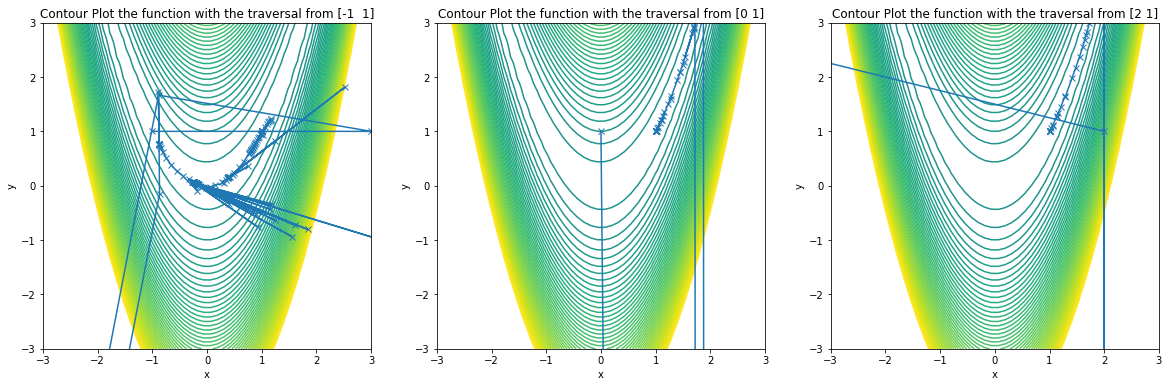

In [15]:
start_list = [start1_bfgs, start2_bfgs, start3_bfgs]
fig, axs = plt.subplots(1, 3, figsize = (20,6))
for i, ax in enumerate(axs):
    levels = np.linspace(-2000, 2000, 100)
    ax.contour(xmesh, ymesh, fmesh, levels = levels)
    start = np.array(start_list[i])
    ax.plot(start.T[0], start.T[1], "x-")
    ax.set_title(f"Contour Plot the function with the traversal from {points[i]}")
    ax.set_xlim(-3,3)
    ax.set_ylim(-3,3)
    ax.set_xlabel("x")
    ax.set_ylabel("y")

# Problem 2

Got help from Yue and Jovana Office Hours.

## Part a

Lagrange function:

$$L(b, \lambda) = T + \lambda(I-R) $$


Intermediate steps:

$$\frac{\delta y}{\delta x} = y' = \frac{\pi}{L} \sum_{k=1}^{20} k b_k cos \frac {\pi k x }{L}$$

$$ \frac {\delta y}{\delta b} = \sum_{k=1}^{20} sin \frac{\pi k x}{ L} = sin \frac {\pi x k}{L}$$

$$ \frac {\delta y}{\delta b_k} = sin \frac {\pi x k}{L}$$



$$ \frac{\delta y'}{\delta b_k} = \frac{\pi}{L} k cos \frac{k \pi x}{ L}$$

$$ I = \int_0^L {\sqrt{1+ (y')^2} }dx$$

$$\frac{\delta I}{\delta b} = \int_0^L {(\frac{y'}{\sqrt{1 + (y')^2}})(\frac{\pi}{L} k cos \frac{k x \pi}{L}) } dx$$

$$ T = \int_0^L {p y^2 w^2 \sqrt{1 + (y')^2}} dx$$




Derivative of the Langrange function with respect to $\lambda$:




$$\frac{d L(b, \lambda)}{d \lambda}= (I-R) = \int_{0}^{L} \sqrt{1+(\frac{dy}{dx})^2}-R $$



Derivative of the Langrange function with respect to $b$:



$$\frac{d L(b, \lambda)}{d b}= \frac{d T}{d b} + \lambda(\frac{dI}{d b} - \frac{dR}{d b}) $$


$$= pw^2\int_0^L [2 y \frac {sin(\pi x k)}{L} \sqrt{1+(y')^2} + y^2 \frac{y'}{\sqrt{1+(y')^2}} \frac{\pi}{L} k cos(\frac{\pi x k }{L})]dx + \lambda(\int_0^L \frac{y'}{\sqrt{1+(y')^2}} \frac{\pi}{L}k cos(\frac{\pi xk}{L}))dx $$

## Part b

In [16]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline

R = 3
w = 1
L = 1
p = 1


Rope shape:

$$y(x) =  \sum_{k=1}^{20} b_k sin \frac {\pi k x }{L}$$

Derivative of rope shape to x:

$$\frac{\delta y}{\delta x} = \frac{\pi}{L} \sum_{k=1}^{20} k b_k cos \frac {\pi k x }{L}$$

In [17]:
def y(b, x): #  rope shape
    internal_sum_y = 0 # cant use np.sum because we have k inside
    for k, bi in enumerate(b):
        internal_sum_y = internal_sum_y +  bi * np.sin((np.pi*(k+1)*x)/L)
    return internal_sum_y
        
def dy_dx(b, x): # derivative of rope  shape for x
    internal_sum = 0 # cant use np.sum because we have k inside
    for k, bi in enumerate(b):
        internal_sum  = internal_sum + (k +1) * bi * np.cos((np.pi*(k+1)*x)/L)
    result = (np.pi / L)* internal_sum
    return result 

$$\frac{d L(b, \lambda)}{d \lambda}= (I-R) = \int_{0}^{L} \sqrt{1+(\frac{dy}{dx})^2}-R $$

$$\frac{d L(b, \lambda)}{d \lambda}= (I-R) = \int_{0}^{L} \sqrt{1+ ( \frac{\pi}{L}  \sum_{k=1}^{20} k b_k cos \frac {\pi k x }{L})^2}-R $$




In [18]:
def lagrange_derivative_lambda(b):
    #np.trapz ( y = array, x = number of points, dx = spacing between these points)
    # number of points will be linspace
    xs = np.linspace(0, L, 251)
    def f(x):
        return np.sqrt(1 + dy_dx(b,x)**2)
    #f = 1 + dy_dx(b,x)**2
    #result = np.trapz( [f(x) for x in xs], xs) - R
    result = np.trapz( f(xs), xs) - R
    
    return result


$$\frac{d L(b, \lambda)}{d b}= \frac{d T}{d b} + \lambda(\frac{dI}{d b} - \frac{dR}{d b}) $$

$$= pw^2\int_0^L [2 y \frac {sin(\pi x k)}{L} \sqrt{1+(y')^2} + y^2 \frac{y'}{\sqrt{1+(y')^2}} \frac{\pi}{L} k cos(\frac{\pi x k }{L})]dx + \lambda(\int_0^L \frac{y'}{\sqrt{1+(y')^2}} \frac{\pi}{L}k cos(\frac{\pi xk}{L}))dx $$

In [19]:
def lagrange_derivative_b(b, k, lam):
    xs = np.linspace( 0, L, 251)
    def part1(x):
        return 2*y(b, x)*(np.sin(np.pi*x*(k+0))/L)*np.sqrt(1+dy_dx(b, x)**2) + y(b, x)**2 * ((dy_dx(b, x)/ (np.sqrt(1+(dy_dx(b, x)**2)))))*(k+0)*(np.pi/L)*(np.cos((np.pi*x*(k+0))/L))
    #part1 = 2*y(b, L)*(np.sin(np.pi*x*k)/L)*(np.sqrt(1+(dy_dx(b, L)**2))) + y(b, L)**2 * ((dy_dx(b, L)/ (np.sqrt(1+(dy_dx(b, L)**2)))))
    #integrate_part1 = np.trapz([part1(x) for x in xs], xs)
    integrate_part1 = np.trapz(part1(xs), xs)
    

    def part2(x):
        return ((dy_dx(b, x)/ (np.sqrt(1+(dy_dx(b, x)**2))))) * (np.pi/L) * (k+0) * (np.cos((np.pi *x *(k+0))/L))
    #part2 = ((dy_dx(b, L)/ (np.sqrt(1+(dy_dx(b, L)**2))))) * (np.pi/L) * k * (np.cos((np.pi *x *k)/L))
    #integrate_part2 = np.trapz([part2(x) for x in xs], xs)
    integrate_part2 = np.trapz(part2(xs), xs)



    result = p*(w**2)*integrate_part1 + lam*integrate_part2
    return result
    

In [20]:
def grad_L(p):
    # the b vector has 20 elements
    # the p vector has 21 elements
    b  = p[:-1]
    lam = p[-1]
    g_results = []

    #I want to evaluate the lagrange derivative of b for every k, hence i need a loop
    for k, bi in enumerate(b):
        res = lagrange_derivative_b(b, k+1, lam)
        g_results.append(res)

    #the last append will be from the derivative in respect to lambda
    g_results.append(lagrange_derivative_lambda(b))
    #print("p vector: ",p)
    #print("g results :", g_results)
    return g_results
    #array= np.asarray(g_results)g_results.reshape((21,))

In [21]:
# import warnings
# warnings.filterwarnings("ignore", category=RuntimeWarning) 

p_0 = np.zeros((21,))
p_0[0] = 1.3 #initial guess for b1

#initial guess
solve_with_guess = fsolve(grad_L,p_0,xtol=10e-6) #, full_output=True )



# debug=grad_L(p_0)
# for de in debug:
#     print("%.06f" % de)

In [22]:
p_0 == solve_with_guess

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [23]:
solve_with_guess

# debug=solve_with_guess
# for de in debug:
#     print("%.06f" % de)

array([ 1.44289102e+00,  2.49489694e-09,  1.00094878e-01,  4.44310581e-10,
        7.50006808e-03,  1.05045507e-10,  5.62211172e-04,  4.04870587e-10,
        4.21437448e-05,  1.29668641e-10,  3.15912746e-06,  1.06734645e-10,
        2.36885977e-07,  2.30247492e-10,  1.77743265e-08,  6.33086796e-11,
        1.34253764e-09,  4.96694215e-11,  1.40645969e-10,  7.54694771e-11,
       -2.20982903e+00])

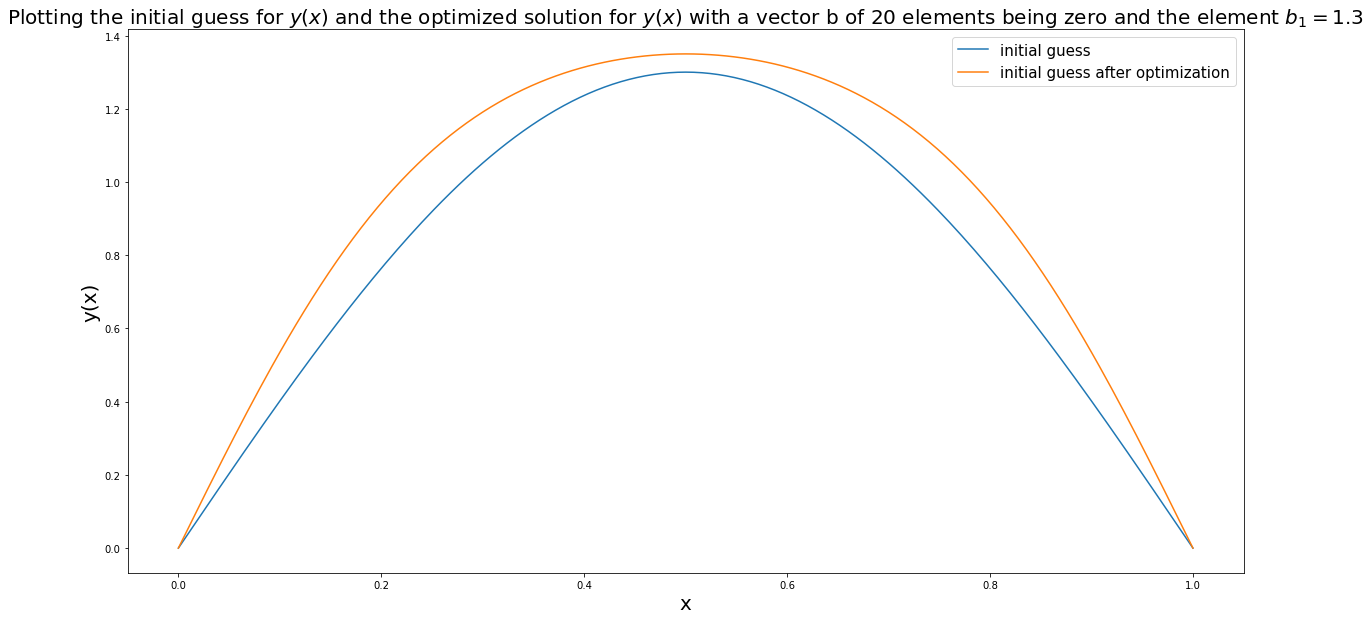

In [24]:
x_lins = np.linspace(0, L, 251)
y_guess = y(p_0[:-1], x_lins)
y_guess_optimized = y(solve_with_guess[:-1], x_lins)

plt.figure(figsize = (20, 10))
plt.title("Plotting the initial guess for $y(x)$ and the optimized solution for $y(x)$ with a vector b of 20 elements being zero and the element $b_1= 1.3$", size = 20)


plt.plot(x_lins, y_guess, label = "initial guess")

plt.plot(x_lins, y_guess_optimized, label = "initial guess after optimization")
plt.xlabel("x", size = 20)
plt.ylabel("y(x)", size = 20)


plt.legend(fontsize = 15)
plt.show()

## Part C

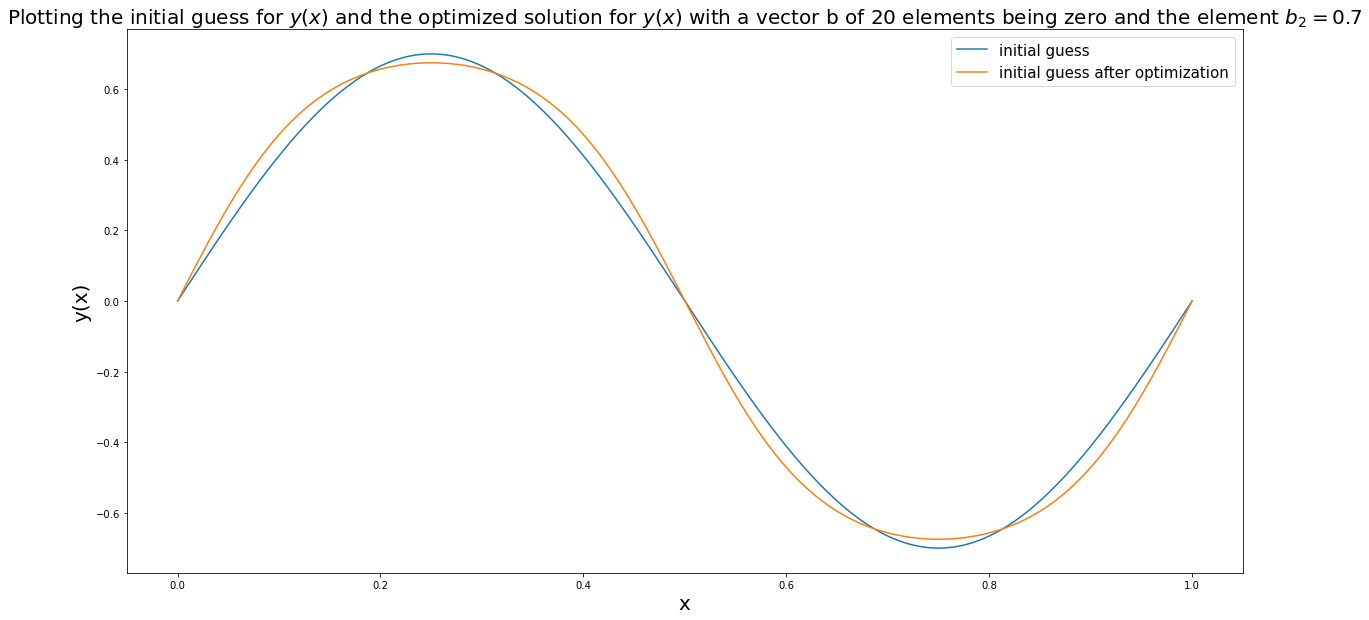

In [25]:
#import warnings
#warnings.filterwarnings("ignore", category=RuntimeWarning) 

p_0 = np.zeros((21,))
p_0[1] = 0.7 #initial guess for b1

#initial guess
solve_with_guess = fsolve(grad_L,p_0 ) 

plt.figure(figsize = (20, 10))
plt.title("Plotting the initial guess for $y(x)$ and the optimized solution for $y(x)$ with a vector b of 20 elements being zero and the element $b_2= 0.7$", size = 20)




x_lins = np.linspace(0, L, 251)
y_guess = y(p_0[:-1], x_lins)
y_guess_optimized = y(solve_with_guess[:-1], x_lins)


plt.plot(x_lins, y_guess, label = "initial guess")
plt.plot(x_lins, y_guess_optimized, label = "initial guess after optimization")
plt.xlabel("x", size = 20)
plt.ylabel("y(x)", size = 20)


plt.legend(fontsize = 15)
plt.show()

# Problem 3

Got help from Chris Office Hours.

For this problem I consider the one-dimensional time-independent Schrödinger equation, which governs the behaviour of a quantum particle in a potential well. In non-dimensionalized units where $\frac{h^{2}}{2m} = 1$, the equation is:

$$-\frac{\delta^2 \psi}{\delta x^2} + v(x) \psi(x) = E \psi(x)$$

where $v$ is a real-valued potential function, where $\psi$ is the wavefunction and where $E$ is an eigenvalue which corresponds to the energu of the system.  

In this exercise I shall consider the finite interval $[-12, 12]$ and I shall impoze zero Dirichlet boundary conditions at the boundaries, i.e. $\psi (\pm 12) = 0$.

## Part a

In part a, I will comput the 5 lowest eigenvalues and the corresponding eigenmodes for 3 potential functions. 

$$v_1(x) = |x|$$

$$v_2(x) = 12 (\frac{x}{10})^4 - \frac{x^2}{18} + \frac{x}{8} + \frac{13}{10}$$

$$v_3(x) = 7 ||  |x| - 1| - 1| $$


I additionally do this also for $v_0$ as a sanity check, i.e. the one provided in the exericse prompt:

$$v_0(x) = \frac{x^2}{10}$$

In [26]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.sparse.linalg as spl



In [27]:
n =1921-2 #due to the boundary conditionsm, phi = 0 at -12 and +12
h = 24/n #stepsize

# potentials
def v0(x):
    return (x**2)/10

def v1(x):
    return np.abs(x)

def v2(x):
    return 12*(x/10)**4 - (x**2)/18 + x/8 + 13/10

def v3(x):
    return 7* np.abs(np.abs(np.abs(x)-1)-1)

def finite_difference(v):
    # this is the matrix which has 3 diagonals with the derivatives
    # all the rest of the diagonal is empty
    # thence, sparse matrices
    sparse_matrix = np.zeros((n,n))
    
    for i in range(n):
        if i+1 < n:
            sparse_matrix[i, i+1] = -1/(h**2)
        if i-1 >= 0:
            sparse_matrix[i, i-1] = -1/(h**2)
    #for i in range(n):
        x = i*h - 12
        sparse_matrix[i,i] = v(x) + 2/(h**2)
    return sparse_matrix


sparse0 = finite_difference(v0)
sparse1 = finite_difference(v1)
sparse2 = finite_difference(v2)
sparse3 = finite_difference(v3)

#print(sparse0)
#print(sparse0.shape)




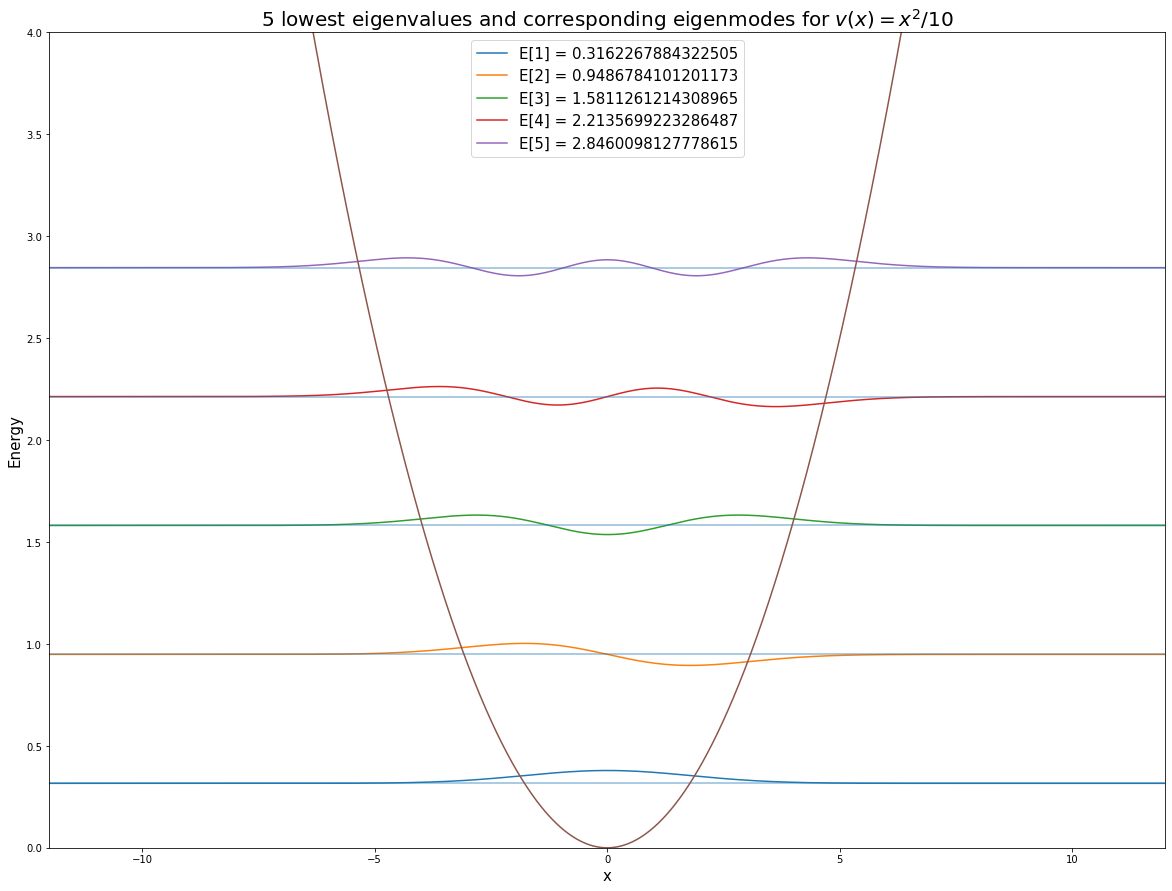

In [28]:
# using eigs to find the lowest 5 eigs vector 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.eigs.html 

vals0, vecs0 = spl.eigs(sparse0, k=5, which='SM')

x_lin = np.linspace(-12, 12, n)
plt.figure(figsize=(20,15))
for i in range(5):
    #text = f"E1={vals1[i]}"
    plt.plot(x_lin, np.real(vecs0[:,i] + vals0[i]), label = f"E[{i+1}] = {np.real(vals0[i])}")

for i in vals0:
    plt.axhline(np.real(i), alpha = 0.5)

plt.title("5 lowest eigenvalues and corresponding eigenmodes for $v(x) = x^2/10$", size = 20)
plt.ylabel("Energy", size = 15)
plt.xlabel("x", size =15)
plt.plot(x_lin, v0(x_lin))
plt.ylim(0, 4)
plt.xlim(-12,12)
plt.legend(loc="best", fontsize = 15)
plt.show()

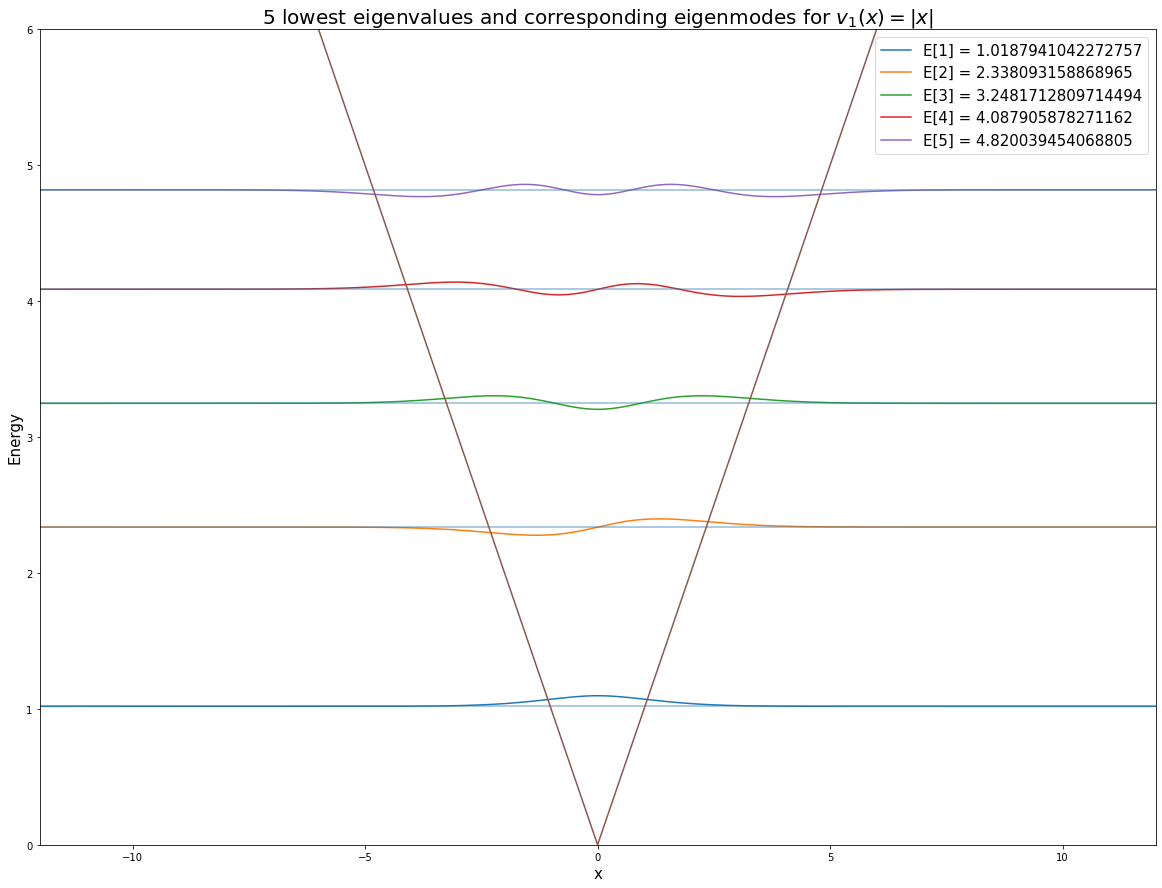

In [29]:
x_lin = np.linspace(-12, 12, n)
plt.figure(figsize=(20,15))



vals1, vecs1 = spl.eigs(sparse1, k=5, which='SM')
x_lin = np.linspace(-12, 12, n)
for i in range(5):
    #text = f"E1={vals[i]}"
    plt.plot(x_lin, np.real(vecs1[:,i] + vals1[i]),  label = f"E[{i+1}] = {np.real(vals1[i])}")

for i in vals1:
    plt.axhline(np.real(i), alpha = 0.5)

plt.title("5 lowest eigenvalues and corresponding eigenmodes for $v_1(x) = |x|$", size = 20)
plt.ylabel("Energy", size = 15)
plt.xlabel("x", size = 15)
plt.plot(x_lin, np.real(v1(x_lin)))
plt.ylim(0, 6)
plt.xlim(-12,12)
plt.legend(loc="best", fontsize = 15)
plt.show()

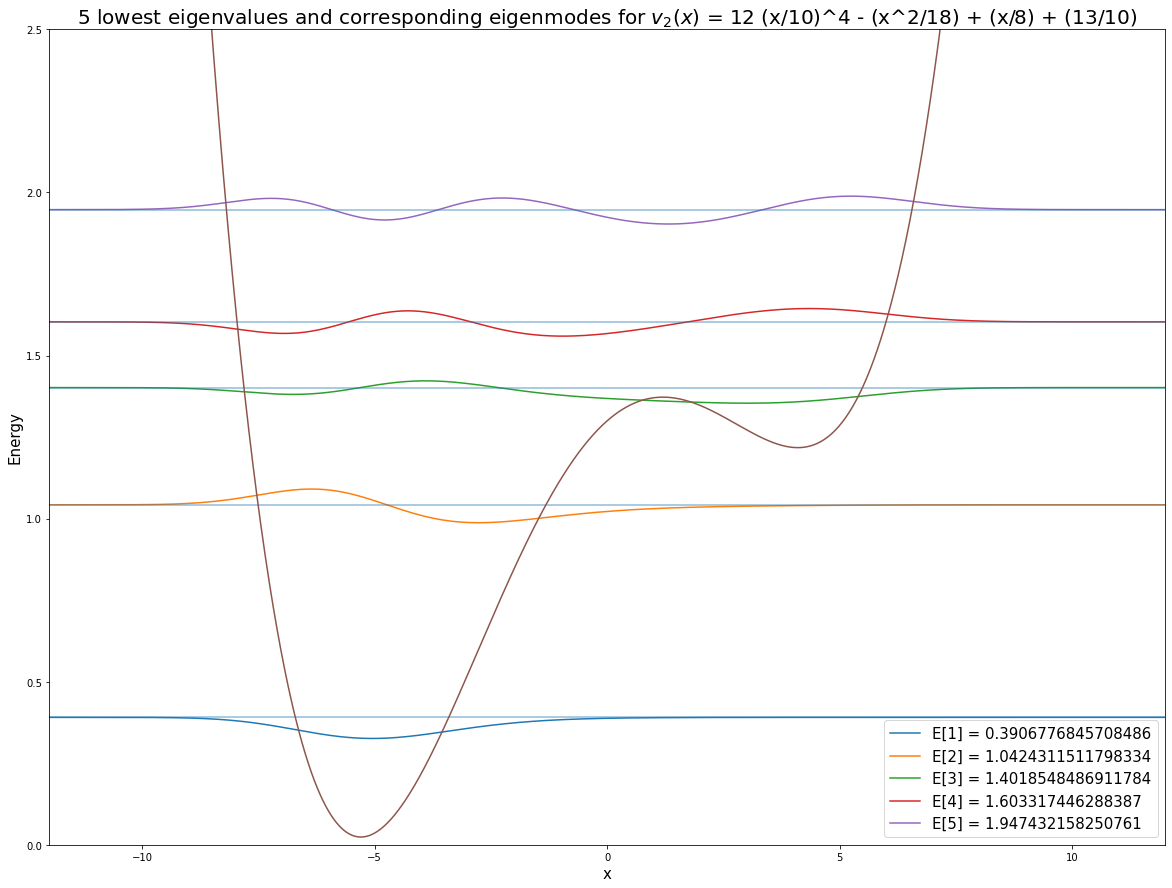

In [30]:
vals2, vecs2 = spl.eigs(sparse2, k=5, which='SM')
x_lin = np.linspace(-12, 12, n)
plt.figure(figsize=(20,15))


for i in range(5):
    #text = f"E1={vals[i]}"
    plt.plot(x_lin, np.real(vecs2[:,i] + vals2[i]),  label = f"E[{i+1}] = {np.real(vals2[i])}")

for i in vals2:
    plt.axhline(np.real(i), alpha = 0.5)

plt.title("5 lowest eigenvalues and corresponding eigenmodes for $v_2(x)$ = 12 (x/10)^4 - (x^2/18) + (x/8) + (13/10)", size = 20)
plt.ylabel("Energy", size =15)
plt.xlabel("x", size =15)
plt.plot(x_lin, v2(x_lin))
plt.ylim(0, 2.5)
plt.xlim(-12,12)


plt.legend(loc="best", fontsize = 15)

plt.show()



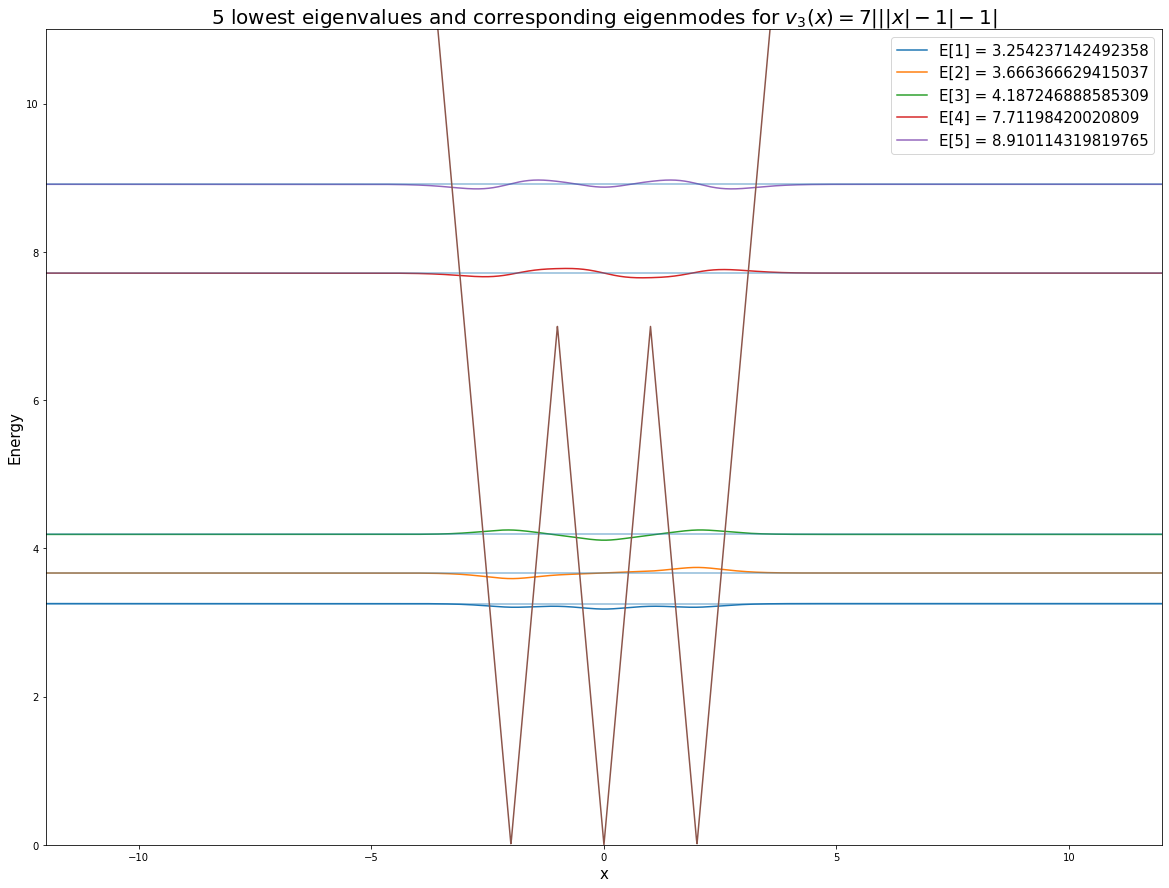

In [31]:
vals3, vecs3 = spl.eigs(sparse3, k=5, which='SM')
x_lin = np.linspace(-12, 12, n)
plt.figure(figsize=(20,15))


for i in range(5):
    #text = f"E1={vals[i]}"
    plt.plot(x_lin, np.real(vecs3[:,i] + vals3[i]), label = f"E[{i+1}] = {np.real(vals3[i])}")

for i in vals3:
    plt.axhline(np.real(i), alpha = 0.5)

plt.title("5 lowest eigenvalues and corresponding eigenmodes for $v_3(x) = 7| | |x| -1| -1 | $", size = 20)
plt.ylabel("Energy", size = 15)
plt.xlabel("x", size =15)
plt.plot(x_lin, v3(x_lin))
plt.ylim(0, 11)
plt.xlim(-12,12)


plt.legend(loc="best", fontsize = 15)

plt.show()

## Part b

* Here I will use Simpson rule for the integrals this time instead of the traps rule

* Here I will calculate the probability of finding a particle (with wave function $\psi(x)$) in a given region $[a,b]$, this will be done with the provided equation: $$ \frac{\int_a^b |\phi(x)|^2 dx}{\int_{-12}^{12} |\phi(x)|^2 dx}$$

* I will do this only for the function $v_2$

* I will calculate the probability of finding a particle (with wave function $\psi(x)$) in a given region $[0,6]$

In [32]:
from scipy.integrate import simps #simpson rule 
#https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.integrate.simps.html


In [33]:
# a = 0
# b = 6

# n = 1921
# sparse2 = finite_difference(v2)
# vals2, vecs2 = spl.eigs(sparse2, k=5, which='SM')



x_lins = np.linspace(-12, 12, n)

# a is at the location 0, hence at this index:
a = int(12/h) #index of a
x_lins[a] #this is a

# b is at the location 6, hence at this index:
b = int(18/h) #index of b
x_lins[b] #this is b


for i in range(5):
    inside = (np.abs(vecs2[:,i]))**2
#     print(inside.shape)
#     print(x_lins.shape)

#     print(x_lins[a:b].shape)
#     print(inside[a:b].shape)
    numerator = simps(inside[a:b],x_lins[a:b] )
    denominator = simps(inside,x_lins )
    p = numerator/denominator
    print(f"E = {vals2[i]}, probability = {p} ")



E = (0.3906776845708486+0j), probability = 0.00031908948234782037 
E = (1.0424311511798334+0j), probability = 0.03056940872472836 
E = (1.4018548486911784+0j), probability = 0.7874355193818028 
E = (1.603317446288387+0j), probability = 0.399814988159576 
E = (1.947432158250761+0j), probability = 0.5312706340513412 
